In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\Mathiass\Documents\Projects\master-thesis\data"
path = Path(path)

In [3]:
# raw option return data
raw = pd.read_parquet(path/"sp500_op_ret.parquet")

In [4]:
raw["date"]

0          1996-01-31 00:00:00
1          1996-01-31 00:00:00
2          1996-01-31 00:00:00
3          1996-01-31 00:00:00
4          1996-01-31 00:00:00
                  ...         
3825526    2021-11-30 00:00:00
3825527    2021-11-30 00:00:00
3825528    2021-11-30 00:00:00
3825529    2021-11-30 00:00:00
3825530    2021-11-30 00:00:00
Name: date, Length: 3825531, dtype: object

In [5]:
# small dataset (already cleaned has 2145 rows less)
data = pd.read_parquet(path/"final_df_small.parquet")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Mathiass\\Documents\\Projects\\master-thesis\\data\\final_df_small.parquet'

In [ ]:
# Are lowest 50 option returns both contained in data and raw?
data["option_ret"].sort_values()[:50].values == raw["option_ret"].sort_values()[:50].values

In [ ]:
# Are the highest 50 option returns both contained in data and raw?
data["option_ret"].sort_values(ascending=False)[:50].values == raw["option_ret"].sort_values(ascending=False)[:50].values

## Top 10 worst returns

In [16]:
#Top 10 worst returns
raw.loc[raw["option_ret"].sort_values()[:10].index, ["date", "option_ret", "optionid", "cp_flag"]]

,date,option_ret,optionid,cp_flag
3083837,2020-02-28 00:00:00,-16010.237592,132018313,C
1323718,2010-05-28 00:00:00,-15369.367007,45086372,C
356693,2001-05-31 00:00:00,-6969.419732,20165479,C
267405,2000-05-31 00:00:00,-6668.701864,10108221,C
1594729,2012-07-31 00:00:00,-4615.544248,81466755,C
1075759,2008-07-31 00:00:00,-4243.383543,33252741,C
1879296,2014-08-29 00:00:00,-3806.802488,83234280,C
475773,2003-02-28 00:00:00,-3134.307265,20962033,C
3152420,2020-04-30 00:00:00,-2665.715171,132343718,C
1883189,2014-08-29 00:00:00,-2648.007664,105080119,C


### Optiond Id 81466755

In [6]:
raw[raw["optionid"]==81466755]["delta"]

1550855    0.479475
1560915    0.613548
1583770    0.503687
1594729    0.538360
1604016    0.372242
Name: delta, dtype: float64

In [7]:
raw[raw["optionid"]==81466755]

,secid,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,...,optionid,cfadj,days_no_trading,days_to_exp,forwardprice,spotprice,adj_spot,ir_rate,mid_price,option_ret
1550855,126938,2012-03-30 00:00:00,2012-10-20 00:00:00,C,435.0,29.15,29.65,10,36,0.284205,...,81466755,1,0,204,420.704621,420.54,42.054,0.004555,29.400,2.073765
1560915,126938,2012-04-30 00:00:00,2012-10-20 00:00:00,C,435.0,49.60,50.55,8,94,0.335298,...,81466755,1,0,173,452.659010,452.27,45.227,0.004643,50.075,-1.173176
1583770,126938,2012-06-29 00:00:00,2012-10-20 00:00:00,C,435.0,24.75,25.35,1,120,0.287199,...,81466755,1,0,113,430.080829,430.11,43.011,0.004331,25.050,-0.553877
1594729,126938,2012-07-31 00:00:00,2012-10-20 00:00:00,C,435.0,23.15,23.85,3,127,0.278454,...,81466755,1,0,81,436.627584,436.57,43.657,0.003739,23.500,-4615.544248
1604016,126938,2012-08-31 00:00:00,2012-10-20 00:00:00,C,435.0,7.90,8.25,21,174,0.212075,...,81466755,1,0,50,422.783973,422.90,42.290,0.003249,8.075,1.260074


In [8]:
# -4615.544248 option return should be:
(8.075 / 23.500 - 1) - 0.538360 * (422.90 / 436.627584 - 1)

-0.6394569245915609

### Optiond Id 20165479

In [9]:
raw[raw["optionid"]==20165479]["delta"]

353793    0.236497
356693    0.454042
Name: delta, dtype: float64

In [10]:
raw[raw["optionid"]==20165479]

,secid,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,...,optionid,cfadj,days_no_trading,days_to_exp,forwardprice,spotprice,adj_spot,ir_rate,mid_price,option_ret
353793,112026,2001-04-30 00:00:00,2001-08-18 00:00:00,C,60.0,1.3,1.55,37,693,0.432943,...,20165479,1,0,110,49.230354,48.60,6.07500,0.043150,1.425,133.857793
356693,112026,2001-05-31 00:00:00,2001-08-18 00:00:00,C,60.0,3.1,3.40,50,693,0.397127,...,20165479,1,0,79,57.759125,57.27,7.15875,0.039788,3.250,-6969.419732


In [11]:
# 133.85 option return should be:
(3.250 / 1.425 - 1) - 0.236497 * (57.27 / 48.60 - 1)

1.2385118574723846

## Top 10 best returns

In [12]:
#Top 10 best returns
raw.loc[raw["option_ret"].sort_values(ascending=False)[:10].index, ["date", "option_ret", "optionid", "cp_flag"]]

,date,option_ret,optionid,cp_flag
2104225,2015-10-30 00:00:00,74252.888685,102054672,C
1615906,2012-09-28 00:00:00,27979.489254,66320130,C
3120356,2020-03-31 00:00:00,17452.485915,132343774,C
1620506,2012-10-31 00:00:00,12037.692991,74014415,C
1835567,2014-05-30 00:00:00,11947.797354,102819288,C
179984,1999-05-28 00:00:00,11925.666320,10189534,C
12757,1996-04-30 00:00:00,6953.112214,10425099,C
1753451,2013-11-29 00:00:00,6883.764660,100945596,C
724691,2005-12-30 00:00:00,4810.721969,27266915,C
1528391,2012-01-31 00:00:00,4271.793028,62435062,C


### Optiond Id 66320130

In [8]:
raw[raw["optionid"]==66320130]["delta"]

1526846    0.848106
1560071    0.651892
1570998    0.485178
1582947    0.497496
1594127    0.316227
1615906    0.180696
1619867    0.634070
1628563    0.709665
Name: delta, dtype: float64

In [9]:
raw[raw["optionid"]==66320130]

,secid,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,...,optionid,cfadj,days_no_trading,days_to_exp,forwardprice,spotprice,adj_spot,ir_rate,mid_price,option_ret
1526846,115422,2012-01-31 00:00:00,2013-01-19 00:00:00,C,75.0,54.70,55.50,5,220,0.715199,...,66320130,1,0,354,120.746930,120.2000,17.171429,0.004695,55.100,-0.209751
1560071,115422,2012-04-30 00:00:00,2013-01-19 00:00:00,C,75.0,18.15,18.40,29,219,0.594645,...,66320130,1,0,264,80.419825,80.1400,11.448571,0.004839,18.275,-0.656208
1570998,115422,2012-05-31 00:00:00,2013-01-19 00:00:00,C,75.0,9.50,9.75,20,284,0.673245,...,66320130,1,0,233,63.653182,63.4400,9.062857,0.005281,9.625,-0.215129
1582947,115422,2012-06-29 00:00:00,2013-01-19 00:00:00,C,75.0,8.75,8.95,6,329,0.555102,...,66320130,1,0,204,68.661406,68.4850,9.783571,0.004628,8.850,-1.047801
1594127,115422,2012-07-31 00:00:00,2013-01-19 00:00:00,C,75.0,3.80,3.90,17,519,0.590869,...,66320130,1,0,172,56.950346,56.8500,8.121429,0.003764,3.850,-0.471727
1615906,115422,2012-09-28 00:00:00,2013-01-19 00:00:00,C,75.0,1.37,1.44,149,1192,0.542385,...,66320130,1,0,113,54.491953,54.4400,7.777143,0.003109,1.405,27979.489254
1619867,115422,2012-10-31 00:00:00,2013-01-19 00:00:00,C,75.0,10.30,10.50,2710,5829,0.566203,...,66320130,1,0,80,79.288826,79.2394,11.319914,0.002884,10.400,-0.247888
1628563,115422,2012-11-30 00:00:00,2013-01-19 00:00:00,C,75.0,9.75,9.90,59,3536,0.511838,...,66320130,1,0,50,81.740109,81.7100,11.672857,0.002751,9.825,4.410237


In [4]:
(0.180696 * 79.2394 - 10.400) / (0.180696 *	54.4400 - 1.405) - 1

-0.5353177550433807

In [14]:
# 27979.489254 return of optionid 66320130, row 1615906 should be:
(10.400 /1.405 - 1) - 0.180696 * (79.2394 / 54.4400 - 1) - (113 - 80) * 0.003109 * (1.405 - 0.180696 *54.4400 ) / 365

6.322191787955303

In [12]:
# -0.471727 return should be: (one row before)
(1.405 / 3.850 - 1) -  0.316227 * (54.4400 / 56.8500)

-0.937886357756228

### option id of worst peforming option in a month: optionid 132018313

In [ ]:
# option id
raw.iloc[3083837]["optionid"]

In [ ]:
raw[raw["optionid"]==132018313]

In [ ]:
# midprice
((38.70 + 39.50) / 2)

In [ ]:
# midprice
(64.35+62.75)/2

In [ ]:
raw[raw["optionid"]==132018313]["delta"]

In [ ]:
# -16010.237592: delta hedged return? Long: Call - Short: delta * stock return?
(63.55 / 39.10 - 1) - 0.399147 * (667.99 / 650.57 - 1)

### option id of best peforming option in a month: optionid 102054672

In [ ]:
# option id
raw.iloc[2104225]["optionid"]

In [ ]:
raw[raw["optionid"]==102054672]

In [ ]:
raw[raw["optionid"]==102054672]["delta"]

In [ ]:
# -0.568111 return first row should be:
(30.925 / 40.150) - 1 - 0.672843 * (188.77 / 203.34 - 1)

In [ ]:
# 2.169832 return second row should be:
(53.325 / 30.925) - 1  - 0.778151 * (226.05 / 188.77 - 1)

In [ ]:
-0.568111 / -0.18155190647733288

In [ ]:
2.169832 / 0.5706567949655278

<AxesSubplot:>

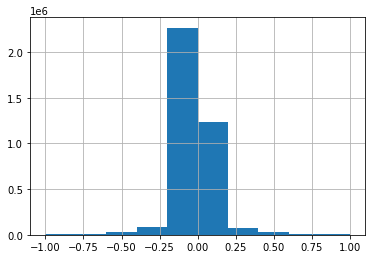

In [26]:
raw[(raw["option_ret"] < 1)  & (raw["option_ret"] > -1)]["option_ret"].hist()

In [ ]:
test = raw[(raw["option_ret"] > -90) & (raw["option_ret"] < 10)]
test["option_ret"].plot()

In [ ]:
raw

In [ ]:
len(raw) - len(raw[(raw["option_ret"] > -90) & (raw["option_ret"] < 10)])